In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', None)

Задача 2. Аналіз продавців та товарів

У цьому блоку я б хотів бачити аналітику продавців та товарів, які розміщуються на нашому маркетплейсі. Вам надані дані: sellers, products – на базі них необхідно побудувати аналітичний звіт який включає: найбільш/найменш оборотних продавців, лідерів/аутсайдерів за продажами у кожній області. По товарам нас цікавить аналітика по товарообігу, які товари продаються найкраще в кожній категорії а також, залежність ваги товару від товарообігу та ціни. Цікаво, також, побачити сегментацію продавців та товарів з текстовими висновками, щодо бізнес-цінності використання даних результатів.

Як результат: Візуальна репрезентація результатів (.ipynb файл з візауалізаціями або BI-звіт) аналітики та код, який її сформував.

In [2]:
folder = '/kaggle/input/test-assigment-smart-it/'

order_payments = pd.read_csv(folder + 'order_payments.csv')
order_items = pd.read_csv(folder + 'order_items.csv')
orders = pd.read_csv(folder + 'orders.csv')
sellers = pd.read_csv(folder + 'sellers.csv')
products = pd.read_csv(folder + 'products.csv')
product_category_name_translation = pd.read_csv(folder + 'product_category_name_translation.csv')

In [3]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

order_items = pd.merge(order_items, orders[['order_id', 'order_status']], on='order_id')

order_items = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id')

order_items = pd.merge(order_items, product_category_name_translation, on='product_category_name')

In [4]:
# orders['order_status'].value_counts()

In [5]:
sellers['cashflow'] = 0.0
sellers['delivered_products'] = 0


for r in range(len(sellers)):
    seller = sellers.loc[r, 'seller_id']
    
    cond1 = order_items['seller_id'] == seller
    cond2 = order_items['order_status'] == 'delivered'
    
    cashflow = order_items[cond1 & cond2]['price'].sum()
    count_products = len(order_items[cond1 & cond2])
    
    sellers.loc[r, 'cashflow'] = cashflow
    sellers.loc[r, 'delivered_products'] = count_products

# Top sellers by cashflow and circulation of products.

I make two different top lists. First is top 20 by delivered products(circulation of products) and second is top 20 by cashflow, then I merge them into one. So that not only sellers with high cost products could be in the top but sellers with big circulation of cheaper products as well

In [6]:
top_20_by_delivered_products = sellers.sort_values(by='delivered_products').tail(20)
top_20_by_cashflow = sellers.sort_values(by='cashflow').tail(20)


top_20_indexes_merged = list(set(tuple(top_20_by_delivered_products.index) + tuple(top_20_by_cashflow.index)))
print(f'After removing duplicates from two top_20 lists, there is only {len(top_20_indexes_merged)} sellers')

sellers.loc(axis=0)[top_20_indexes_merged].sort_values(by='cashflow', ascending=False)[
    ['seller_id', 'cashflow', 'delivered_products']]

After removing duplicates from two top_20 lists, there is only 27 sellers


,seller_id,cashflow,delivered_products
2617,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93,1148
901,53243585a1d6dc2643021fd1853d8905,217940.44,400
2463,4a3ca9315b744ce9f8e9374361493884,196882.12,1949
557,fa1c13f2614d7b5c4749cbc52fecda94,190917.14,579
1182,7c67e1448b00f6e969d365cea6b010ab,186570.05,1355
68,7e93a43ef30c4f03f38b393420bc753a,165981.49,322
1873,da8622b14eb17ae2831f4ac5b9dab84a,159816.87,1548
2207,7a67c85e85bb2ce8582c35f2203ad736,139658.69,1155
2720,1025f0e2d44d7041d6cf58b6550e0bfa,138208.56,1420
390,955fee9216a65b617aa5c0531780ce60,131836.71,1472


# Bottom 30 sellers by cashflow and circulation of products.

## Sellers with cashflow 0 were not included

In [7]:
sellers[sellers['cashflow'] > 1].sort_values(by=['cashflow']).head(30)[['seller_id', 'cashflow', 'delivered_products']]

,seller_id,cashflow,delivered_products
2333,77128dec4bec4878c37ab7d6169d6f26,6.50,1
2098,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1
2426,ad14615bdd492b01b0d97922e87cb87f,8.25,1
1466,4965a7002cca77301c82d3f91b82e1a9,8.49,1
2605,0f94588695d71662beec8d883ffacf09,9.00,1
3024,c18309219e789960add0b2255ca4b091,9.90,1
3081,95cca791657aabeff15a07eb152d7841,9.99,1
1900,344223b2a90784f64136a8a5da012e7f,10.90,1
726,f9f68daa2af419d38f745478bcb3da1a,11.20,1
273,cc1f04647be106ba74e62b21f358af25,11.90,1


# Top 3 and bottom 3 sellers by each state

Some sellers might be in both or there can be one seller in category, that means that there is no more sellers.

In [8]:
frames_seller_state = []
frames_seller_state_keys = []

for state in set(sellers.seller_state):
    cond1 = sellers['seller_state'] == state
    cond2 = sellers['cashflow'] > 0
    
    frames_seller_state.append(sellers[cond1 & cond2].sort_values(by=['cashflow'], ascending=False).head(3))
    frames_seller_state.append(sellers[cond1 & cond2].sort_values(by=['cashflow'], ascending=True).head(3))
    
    frames_seller_state_keys.append(state + '_high')
    frames_seller_state_keys.append(state + '_low')
    

pd.concat(frames_seller_state, keys=frames_seller_state_keys)[['seller_id', 'seller_state', 'cashflow']]

seller_id seller_state   cashflow
PR_high 9     ccc4bbb5f32a6ab2b7066a4130f114e3           PR   72926.72
        1992  522620dcb18a6b31cd7bdf73665113a9           PR   56690.49
        1548  77530e9772f57a62c906e1c21538ab82           PR   45676.60
PR_low  3081  95cca791657aabeff15a07eb152d7841           PR       9.99
        925   6bcb2352a2a0c38b845f598298ab9d26           PR      15.90
        1482  804287717b9156fb7a787acd9af4fac1           PR      18.80
MS_high 908   b1fecf4da1fa2689bccffa0121953643           MS    3669.64
        1181  9c068d10aca38e85c50202e17b4a7e88           MS    2658.90
        2427  7df1fc11cc5cbc518b39faa60cf5d67c           MS    1037.60
MS_low  2014  7d484ca289afaac6bf5fc6a1e96d2226           MS     183.20
        854   515d781150feed28a6ac091bb0e3cb8c           MS    1002.35
        2427  7df1fc11cc5cbc518b39faa60cf5d67c           MS    1037.60
ES_high 1109  001cca7ae9ae17fb1caed9dfb1094831           ES   24487.03
        1260  33dd941c27854f7625b968cc6195a552           ES    6787.50
        3010  15aac934c58d886785ac1b17953ea898           ES    3338.90
ES_low  2805  544863df86ed3b78a04e0820d41430ee           ES      23.90
        414   5f57db27027655e6c6a391601daa0258           ES      98.00
        1222  2c9005d8043aff18b8557ffb7b13cda4           ES     109.90
BA_high 901   53243585a1d6dc2643021fd1853d8905           BA  217940.44
        2453  c72de06d72748d1a0dfb2125be43ba63           BA   17522.00
        2685  75d34ebb1bd0bd7dde40dd507b8169c3           BA   12656.33
BA_low  358   43753b27d77860f1654aa72e251a7878           BA      23.90
        1035  eb4a59a06b3948e851a7d7a830bcbc42           BA      32.00
        1086  398cb257329ef7af7f1943a8974a3cbc           BA     145.90
RO_high 653   3364a91ec4d56c98e44174de954b94f6           RO    3579.94
        2122  a5259c149128e82c9d6d46e0c1c812bb           RO    1182.26
RO_low  2122  a5259c149128e82c9d6d46e0c1c812bb           RO    1182.26
        653   3364a91ec4d56c98e44174de954b94f6           RO    3579.94
SE_high 1047  4b39558c138930b9e5489c93b6df5fe3           SE    1096.70
        1826  c53bcd3be457a342a97e39e5a9f0be22           SE     509.50
SE_low  1826  c53bcd3be457a342a97e39e5a9f0be22           SE     509.50
        1047  4b39558c138930b9e5489c93b6df5fe3           SE    1096.70
RN_high 1571  02d35243ea2e497335cd0f076b45675d           RN    5794.00
        1459  52562a9f449c3dc3d53f5f5b9ed74903           RN    3266.60
        2829  41c2bad7229b0c25e6becf179ebf63ff           RN     782.00
RN_low  114   392f7f2c797e4dc077e4311bde2ab8ce           RN      52.00
        948   eaaa46e98c9e61f6764dd1d7a2ab8b3e           RN      98.00
        2829  41c2bad7229b0c25e6becf179ebf63ff           RN     782.00
PE_high 1438  de722cd6dad950a92b7d4f82673f8833           PE   55126.30
        1973  40db9e9aa57f7bb151bcda6b0f9bdbb7           PE   23168.00
        1797  1d0997ff06b524ce9289ffd75114ecd3           PE    3747.00
PE_low  144   70c0fda4c313d87115644d39e62eec60           PE      25.99
        2721  a5dd1946fb63ada8bcaa0c9cd8f11e22           PE     219.62
        3029  eb9267cccc90f1b49c8d2f9887c7dd97           PE     319.90
PB_high 203   a6bd7d1ccdac48c6b33b28596b7eb122           PB   13669.11
        1612  fd435faa3c0422b60440ea3480d0e77c           PB     749.00
        1372  d0d70d21e2234dd7cd3cf63fe414148a           PB     598.40
PB_low  216   739c7d7be81f63812dea0d1b1451c651           PB      77.50
        683   24c1de8d9551c0b4fbc53317d53efda8           PB     355.00
        543   07017df32dc5f2f1d2801e579548d620           PB     488.50
PI_high 703   47efca563408aae19bb7206c2d969ea9           PI    2383.00
PI_low  703   47efca563408aae19bb7206c2d969ea9           PI    2383.00
SP_high 2617  4869f7a5dfa277a7dca6462dcf3b52b2           SP  226987.93
        2463  4a3ca9315b744ce9f8e9374361493884           SP  196882.12
        557   fa1c13f2614d7b5c4749cbc52fecda94           SP  190917.14
SP_low  2333  77128dec4bec4878c37ab7d6169d6f26           SP  

# Top 3 products in each category by their turnover

Here is a frame with top 15 categories by the turnover. Total number of categories is about 70. To ease reading of the table I decided to highlight top 15.

In [9]:
top_15_product_categories = order_items.groupby('product_category_name_english').size().sort_values(ascending=False).head(15)
top_15_product_categories

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
toys                      4117
cool_stuff                3796
perfumery                 3419
baby                      3065
electronics               2767
dtype: int64

In [10]:
frames_product_category = []

for category in top_15_product_categories.index:
    series = order_items[order_items['product_category_name_english'] == category].groupby(
        ['product_id']).size().sort_values(ascending=False)
    
    frames_product_category.append(series.head(3))
    

pd.concat(frames_product_category, keys=top_15_product_categories.index).to_frame('count_products')

count_products
product_category_name_english product_id                                      
bed_bath_table                99a4788cb24856965c36a24e339b6058             488
                              f1c7f353075ce59d8a6f3cf58f419c9c             154
                              06edb72f1e0c64b14c5b79353f7abea3             143
health_beauty                 154e7e31ebfa092203795c972e5804a6             281
                              2b4609f8948be18874494203496bc318             260
                              7c1bd920dbdf22470b68bde975dd3ccf             231
sports_leisure                c6336fa91fbd87c359e44f5dca5a90ed              94
                              e44f675b60b3a3a2453ec36421e06f0f              84
                              362b773250263786dd58670d2df42c3b              73
furniture_decor               aca2eb7d00ea1a7b8ebd4e68314663af             527
                              b532349fe46b38fbc7bb3914c1bdae07             169
                              78efe838c04bbc568be034082200ac20             101
computers_accessories         d1c427060a0f73f6b889a5c7c61f2ac4             343
                              3dd2a17168ec895c781a9191c1e95ad7             274
                              e53e557d5a159f5aa2c5e995dfdf244b             183
housewares                    42a2c92a0979a949ca4ea89ec5c7b934             183
                              5a6e53c3b4e8684b13388d6aa4afdf12              73
                              f7a17d2c51d9df89a4f1711c4ac17f33              63
watches_gifts                 53b36df67ebb7c41585e8d54d6772e08             323
                              a62e25e09e05e6faf31d90c6ec1aa3d1             226
                              e0d64dcfaa3b6db5c54ca298ae101d05             194
telephony                     e7cc48a9daff5436f63d3aad9426f28b              93
                              c9c6fde711572c1ad99ca12728c6af00              79
                              97017430754804328eb9597b7f85da03              69
garden_tools                  422879e10f46682990de24d770e7f83d             484
                              389d119b48cf3043d311335e499d9c6b             392
                              368c6c730842d78016ad823897a372db             388
auto                          4fcb3d9a5f4871e8362dfedbdb02b064              89
                              a50acd33ba7a8da8e9db65094fa990a4              84
                              629e019a6f298a83aeecc7877964f935              74
toys                          880be32f4db1d9f6e2bec38fb6ac23ab              99
                              b5e13c9a353102f79c6206ff5cb61a50              91
                              b623b7cb05ee3248fbe4a6ecbeed79a4              66
cool_stuff                    c6dd917a0be2a704582055949915ab32             120
                              601a360bd2a916ecef0e88de72a6531a             119
                              54d9ac713e253fa1fae9c8003b011c2a             114
perfumery                     2028bf1b01cafb2d2b1901fca4083222             138
                              595fac2a385ac33a80bd5114aec74eb8             106
                              617186c3d97ea56c9c683a8a3974e8c1              95
baby                          cac9e5692471a0700418aa3400b9b2b1              89
                              ea44caac707f7f1325182a538007f838              63
                              8aa6223e400af9c97b07c75993142721              48
electronics                   7ce94ab189134e2d3c05f496d635419c             106
                              93c902b021a9e594f658ab1b0351602a              71
                              ab1f9387c0627dd24000bfbc54fdeee0              69

# Dependence of the weight of products on turnover and price

In [11]:
relations_to_weight = order_items.copy()

product_id_counts = relations_to_weight.groupby('product_id').size().reset_index(name='product_id_counts')
product_last_price = relations_to_weight.sort_values(by='shipping_limit_date').groupby('product_id')['price'].last()

relations_to_weight = pd.merge(product_id_counts, products[['product_id', 'product_weight_g']], on='product_id')
relations_to_weight = relations_to_weight.join(product_last_price, on='product_id')

# relations_to_weight.head(3)

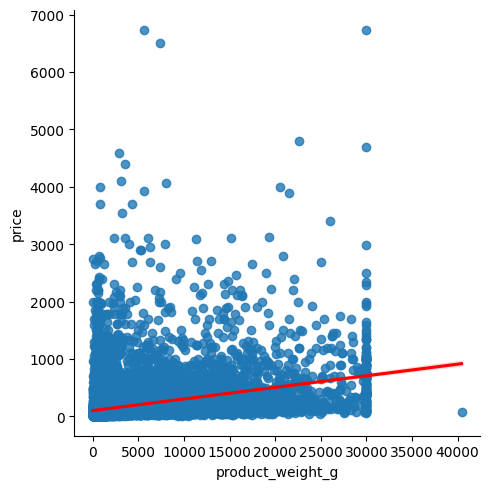

Correlation between product weight and price: 0.35


In [12]:
corr = relations_to_weight['product_weight_g'].corr(relations_to_weight['price'])

sns.lmplot(x='product_weight_g', y='price', data=relations_to_weight, line_kws={'color': 'red'})
plt.show()

print(f"Correlation between product weight and price: {corr:.2f}")

There is some correlation between product weight and price, the heavier weight of product is the higher price is likely to be.

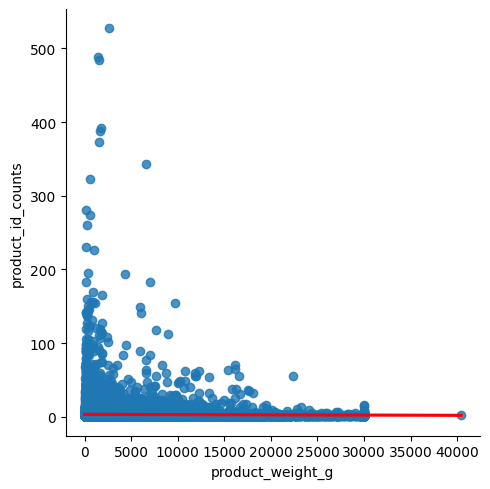

Correlation between product weight and turnover: -0.01


In [13]:
corr = relations_to_weight['product_weight_g'].corr(relations_to_weight['product_id_counts'])

sns.lmplot(x='product_weight_g', y='product_id_counts', data=relations_to_weight, line_kws={'color': 'red'})
plt.show()

print(f"Correlation between product weight and turnover: {corr:.2f}")

However there is no good correlation between product weight and circulation of products.
But we can see that some products that weights less than 10,000 gram have turnover more than 100 times. There is no correlation because most products have turnover less than 10 times.

In [14]:
print('Number of products that have turnover more than 10 times:',
      relations_to_weight[relations_to_weight['product_id_counts'] > 10].size)

Number of products that have turnover more than 10 times: 6612


In [15]:
print('Number of products that are in circulation:', relations_to_weight.size)

Number of products that are in circulation: 129312


## As exploration, I take products with turnover more than 53.

In [16]:
print('Number of products with turnover more than 53:',
      relations_to_weight[relations_to_weight['product_id_counts'] > 53].size)

Number of products with turnover more than 53: 624


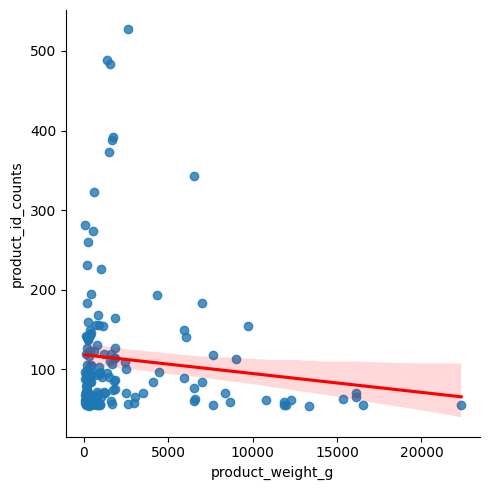

Correlation between product weight and turnover: -0.11


In [17]:
corr = relations_to_weight[relations_to_weight['product_id_counts'] > 53]['product_weight_g'].corr(relations_to_weight['product_id_counts'])

sns.lmplot(x='product_weight_g',
           y='product_id_counts',
           data=relations_to_weight[relations_to_weight['product_id_counts'] > 53], line_kws={'color': 'red'})
plt.show()

print(f"Correlation between product weight and turnover: {corr:.2f}")